## Ejercicio 1 (Prob 2.1 del libro):

Para los datos de Johnson & Johnson (`jj`), considerados como serie $y_t$, considere la transformación $x_t = \log(y_t)$. Dicha transformación muestra los incrementos relativos o porcentuales (al pasar a logaritmo).

1. Ajustar un modelo de la forma:
$$x_t = \beta t + \sum_{i=1}^4 \alpha_i Q_i(t) + w_t$$
siendo $Q_i$ una función que vale $1$ si se está en el trimestre $i$ y $0$ si no.

2. Graficar los datos y superponer los datos ajustados.

3. Calcular los residuos y evaluar el ajuste.

#### Parte 1

In [2]:
library (astsa)



Warning message:
"package 'astsa' was built under R version 3.6.3"

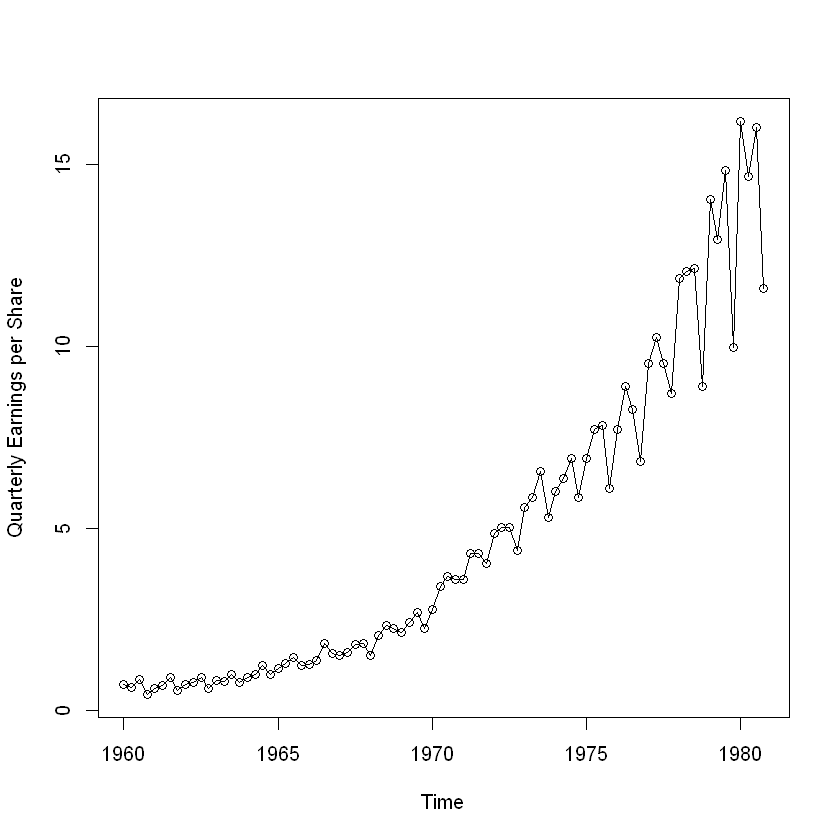

In [3]:
ts.plot(jj, type="o", ylab="Quarterly Earnings per Share") # Grafiquemos la serie

In [4]:
#Centramos la serie

trend = time(jj)-1970 
trend

,Qtr1,Qtr2,Qtr3,Qtr4
1960,-10.00,-9.75,-9.50,-9.25
1961,-9.00,-8.75,-8.50,-8.25
1962,-8.00,-7.75,-7.50,-7.25
1963,-7.00,-6.75,-6.50,-6.25
1964,-6.00,-5.75,-5.50,-5.25
1965,-5.00,-4.75,-4.50,-4.25
1966,-4.00,-3.75,-3.50,-3.25
1967,-3.00,-2.75,-2.50,-2.25
1968,-2.00,-1.75,-1.50,-1.25
1969,-1.00,-0.75,-0.50,-0.25


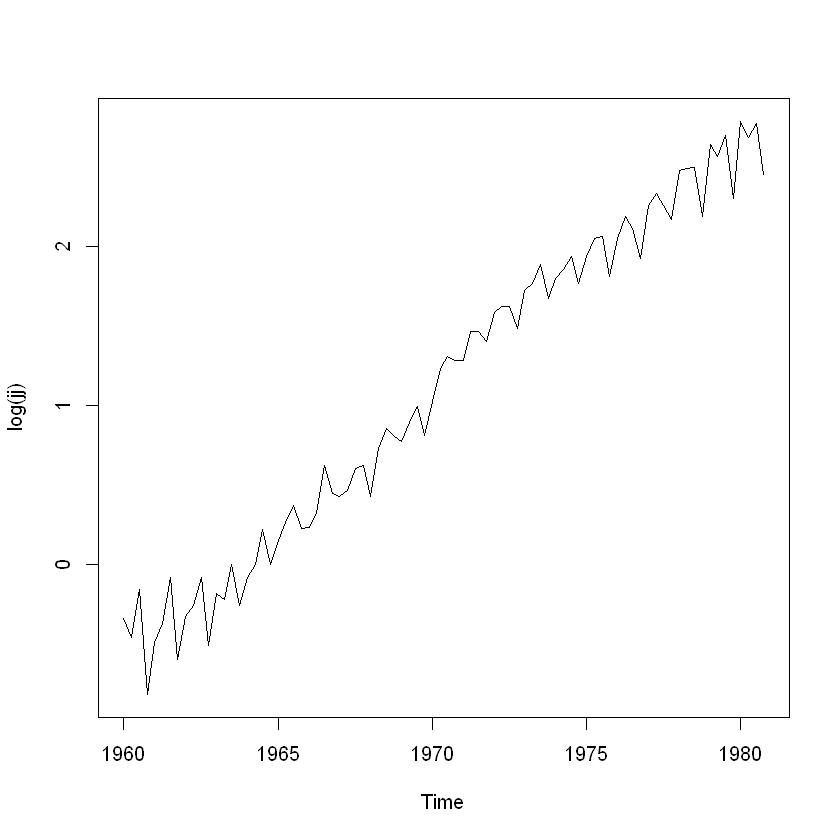

In [5]:
ts.plot(log(jj))

In [6]:
# Definimos Q para poder desagregar la información por quarters de cara al análisis

Q= factor(cycle(jj))
print(Q)

 [1] 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2
[39] 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4 1 2 3 4
[77] 1 2 3 4 1 2 3 4
Levels: 1 2 3 4


In [7]:
#Aplicamos log(jj) para obtener aumentos porcentuales
jjfit1 = lm(log(jj) ~ 0 + trend + Q, na.action=NULL) 

In [8]:
summary(jjfit1)


Call:
lm(formula = log(jj) ~ 0 + trend + Q, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29318 -0.09062 -0.01180  0.08460  0.27644 

Coefficients:
      Estimate Std. Error t value Pr(>|t|)    
trend 0.167172   0.002259   74.00   <2e-16 ***
Q1    1.052793   0.027359   38.48   <2e-16 ***
Q2    1.080916   0.027365   39.50   <2e-16 ***
Q3    1.151024   0.027383   42.03   <2e-16 ***
Q4    0.882266   0.027412   32.19   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1254 on 79 degrees of freedom
Multiple R-squared:  0.9935,	Adjusted R-squared:  0.9931 
F-statistic:  2407 on 5 and 79 DF,  p-value: < 2.2e-16


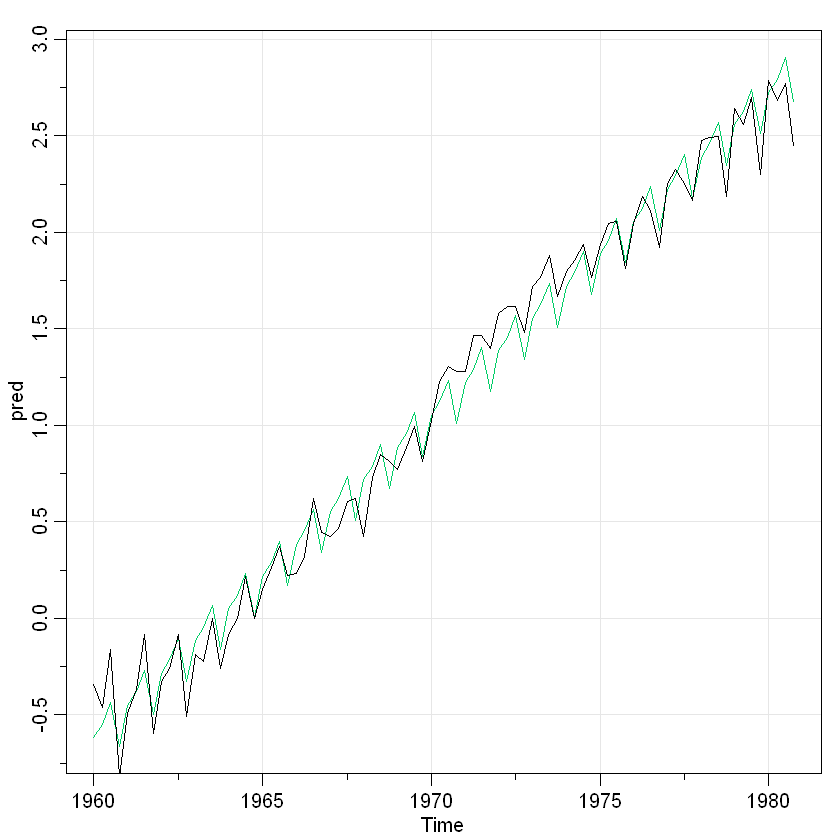

In [9]:
pred = ts(fitted(jjfit1), start=1960, frequency=4)
tsplot(pred, col= "springgreen3")
lines(log(jj))

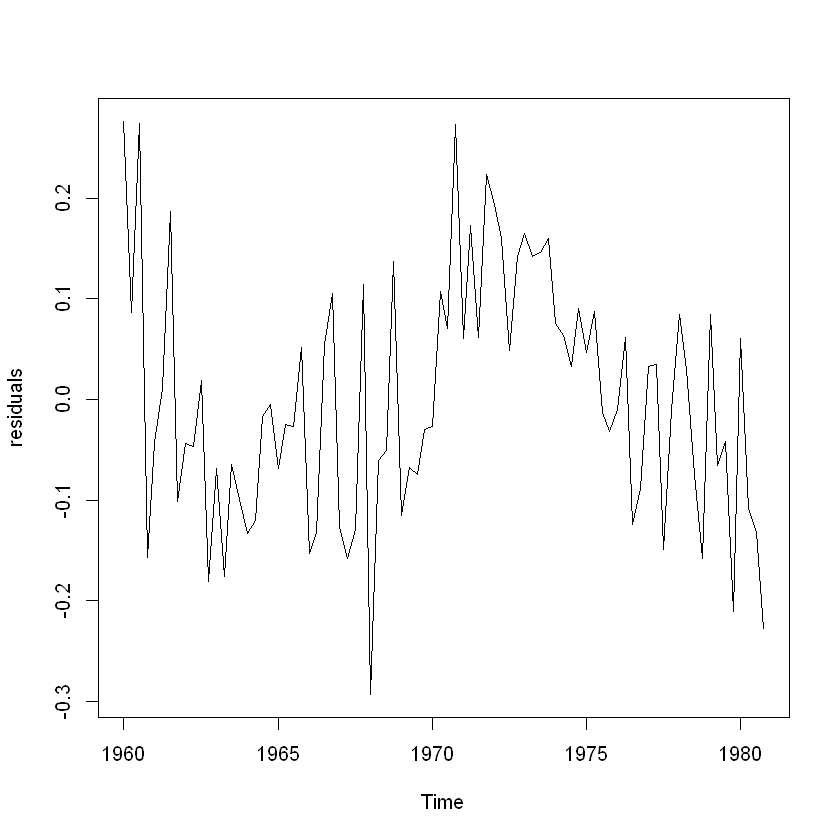

In [10]:
residuals = residuals(jjfit1)

plot(residuals)

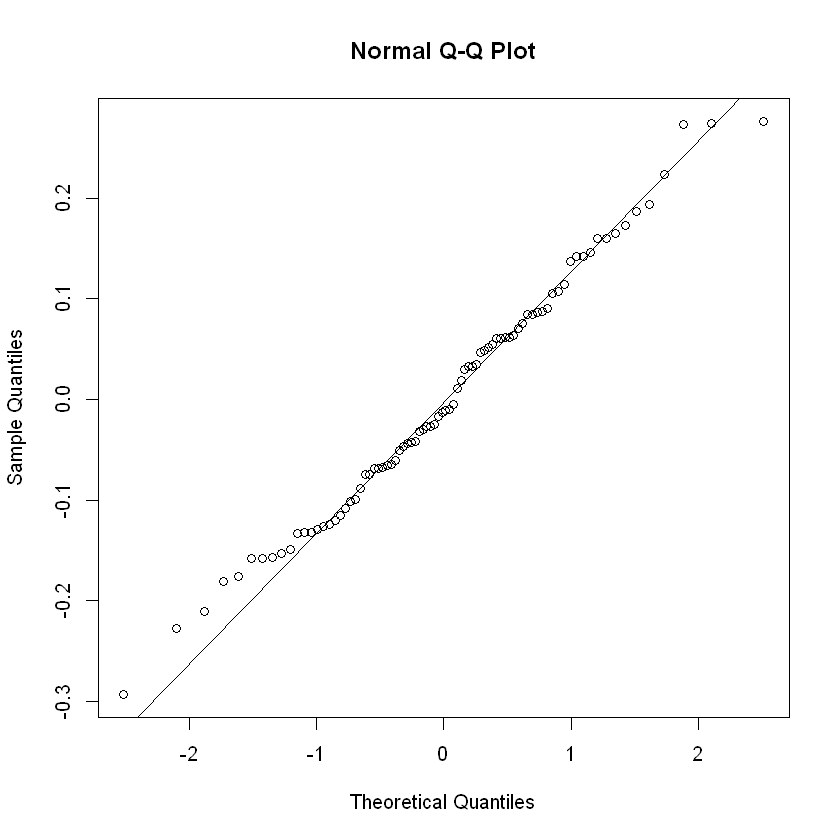

In [11]:
qqnorm(residuals)
qqline(residuals)

ACF,0.31,0.35,0.17,0.60,0.21,0.21,0.12,0.37,0.09,0.03,-0.09,0.14,0.01,-0.07,-0.15,-0.01,0.01,-0.13,-0.17,-0.11
PACF,0.31,0.28,0.01,0.56,-0.13,-0.12,0.11,0.01,-0.14,-0.11,-0.18,0.02,0.07,-0.09,0.03,-0.04,0.11,-0.05,-0.05,-0.04


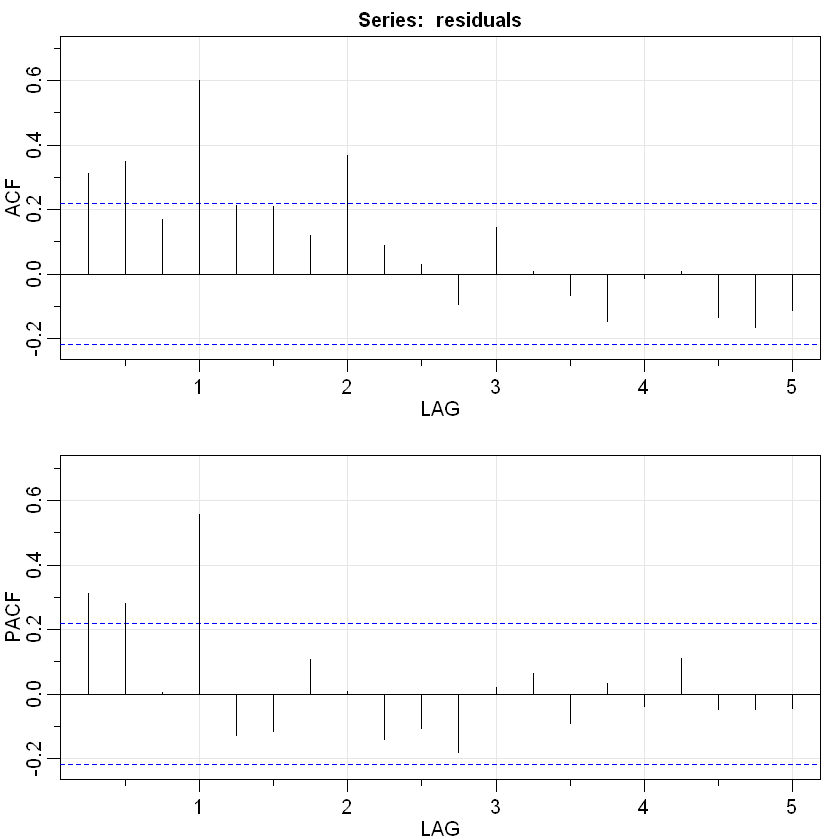

In [12]:
acf2(residuals)

Por lo que podemos observar, tanto en el gráfico de resiudos, su QQplot y el análisis de los ACF y PACF, el ajuste que realizamos con el modelo jjfit1 todavía no capta la totalidad de componentes de la serie, dejando de lado lo que parece ser una estacionalidad anual. 

En detalle, vemos que los residuos graficados no son ruido blanco, que el QQplot no ajusta de buena forma y que en el ACF y PACF vemos todavía indicadores que permanecen fuera de los intervalos de confianza.

### Ejercicio 2 (ajuste de una señal):

Considere la señal generada más abajo, que consiste en una componente periódica más ruido. 

1. Ajuste un modelo de la forma:
$$x_t = \beta_1 + \beta_2 \cos(2\pi t) + \beta_3 \sin(2\pi t).$$

2. Ajuste un modelo de la forma:
$$x_t = \beta_1 + \beta_2 \cos(2\pi t) + \beta_3 \sin(2\pi t) + \beta_4 \cos(2*\pi 2t) + \beta_5 \sin(2\pi 2t).$$
¿Qué captura este segundo modelo?

3. Compare los residuos y los ajustes en cada uno.

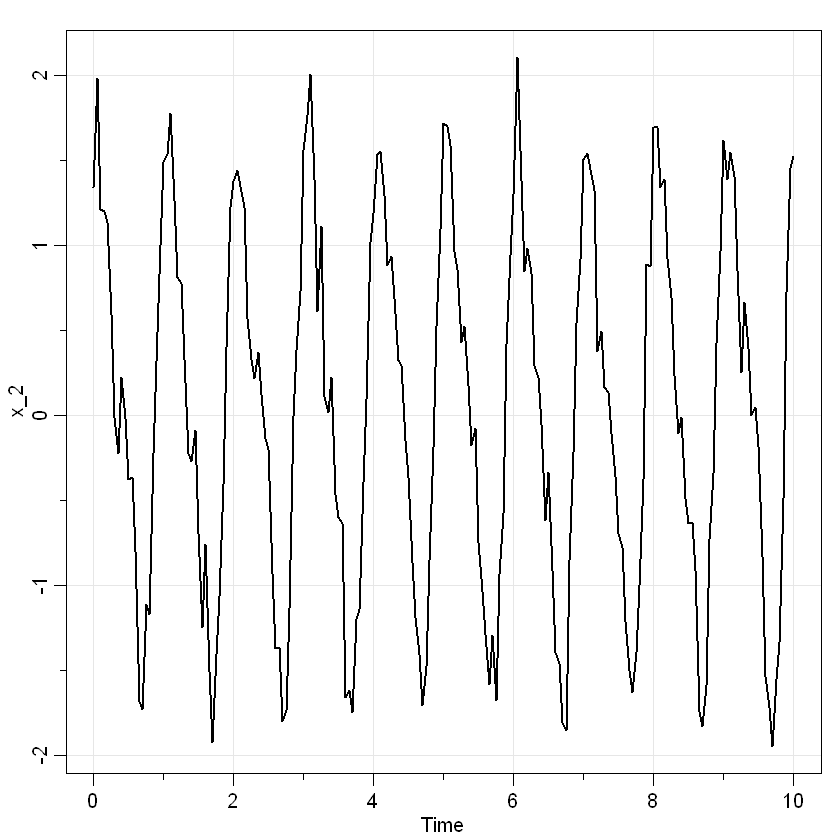

In [13]:
#Definimos la serie a modelar

t=seq(0,10, by=0.05)

s_2 = cos(2*pi*t) + sin(2*pi*t) + 0.5*cos(2*pi*2*t)
w_2=rnorm(length(t),0,0.2)
datos=s_2+w_2;
x_2 = ts(datos,start=0,frequency=20)
tsplot(x_2, lwd=2)

In [14]:
trend2 = time(x_2)
trend2

A Time Series:
  [1]  0.00  0.05  0.10  0.15  0.20  0.25  0.30  0.35  0.40  0.45  0.50  0.55
 [13]  0.60  0.65  0.70  0.75  0.80  0.85  0.90  0.95  1.00  1.05  1.10  1.15
 [25]  1.20  1.25  1.30  1.35  1.40  1.45  1.50  1.55  1.60  1.65  1.70  1.75
 [37]  1.80  1.85  1.90  1.95  2.00  2.05  2.10  2.15  2.20  2.25  2.30  2.35
 [49]  2.40  2.45  2.50  2.55  2.60  2.65  2.70  2.75  2.80  2.85  2.90  2.95
 [61]  3.00  3.05  3.10  3.15  3.20  3.25  3.30  3.35  3.40  3.45  3.50  3.55
 [73]  3.60  3.65  3.70  3.75  3.80  3.85  3.90  3.95  4.00  4.05  4.10  4.15
 [85]  4.20  4.25  4.30  4.35  4.40  4.45  4.50  4.55  4.60  4.65  4.70  4.75
 [97]  4.80  4.85  4.90  4.95  5.00  5.05  5.10  5.15  5.20  5.25  5.30  5.35
[109]  5.40  5.45  5.50  5.55  5.60  5.65  5.70  5.75  5.80  5.85  5.90  5.95
[121]  6.00  6.05  6.10  6.15  6.20  6.25  6.30  6.35  6.40  6.45  6.50  6.55
[133]  6.60  6.65  6.70  6.75  6.80  6.85  6.90  6.95  7.00  7.05  7.10  7.15
[145]  7.20  7.25  7.30  7.35  7.40  7.45  7.50  7.55  7.60  7.65  7.70  7.75
[157]  7.80  7.85  7.90  7.95  8.00  8.05  8.10  8.15  8.20  8.25  8.30  8.35
[169]  8.40  8.45  8.50  8.55  8.60  8.65  8.70  8.75  8.80  8.85  8.90  8.95
[181]  9.00  9.05  9.10  9.15  9.20  9.25  9.30  9.35  9.40  9.45  9.50  9.55
[193]  9.60  9.65  9.70  9.75  9.80  9.85  9.90  9.95 10.00

#### 1. Ajuste del modelo de la forma:  𝑥𝑡=𝛽1+𝛽2cos(2𝜋𝑡)+𝛽3sin(2𝜋𝑡).

In [16]:
# Planteo el modelo lineal usando la función lm 

fit2 = lm(x_2 ~ 0 + cos(2*pi*t) + sin(2*pi*t), na.action=NULL)

summary(fit2)


Call:
lm(formula = x_2 ~ 0 + cos(2 * pi * t) + sin(2 * pi * t), na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.89959 -0.32374  0.01278  0.33376  0.89375 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
cos(2 * pi * t)  0.99162    0.04086   24.27   <2e-16 ***
sin(2 * pi * t)  1.01761    0.04106   24.78   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4106 on 199 degrees of freedom
Multiple R-squared:  0.8581,	Adjusted R-squared:  0.8567 
F-statistic: 601.6 on 2 and 199 DF,  p-value: < 2.2e-16


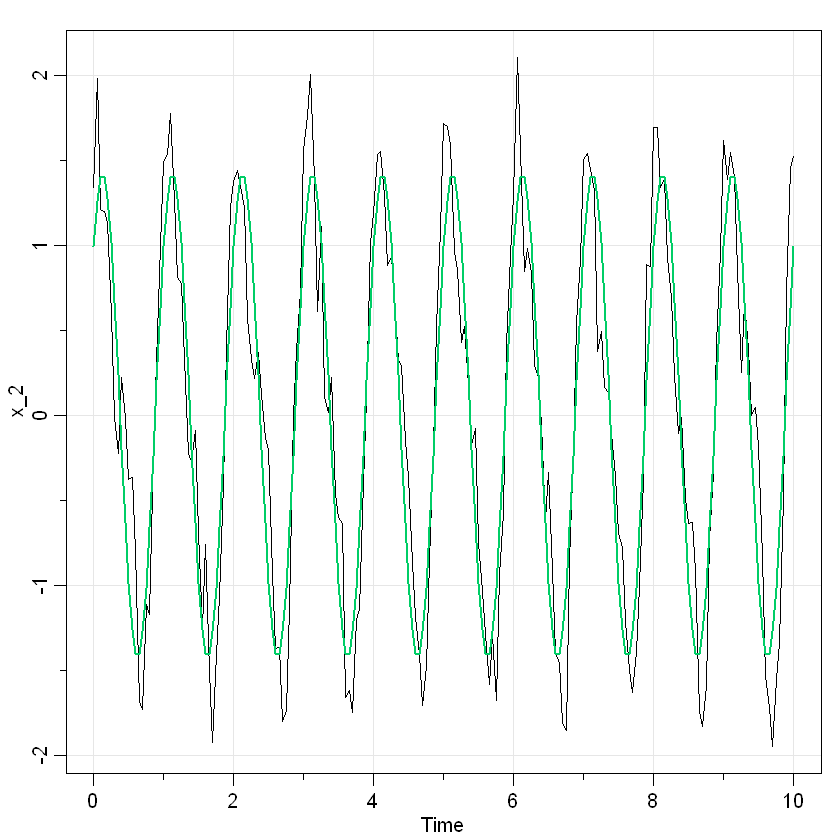

In [17]:
predictions = ts(fitted(fit2), start = 0, frequency=20) #Creo una serie temporal con los valores ajustados.
tsplot(x_2)
lines(predictions, col="springgreen3", lwd=2)

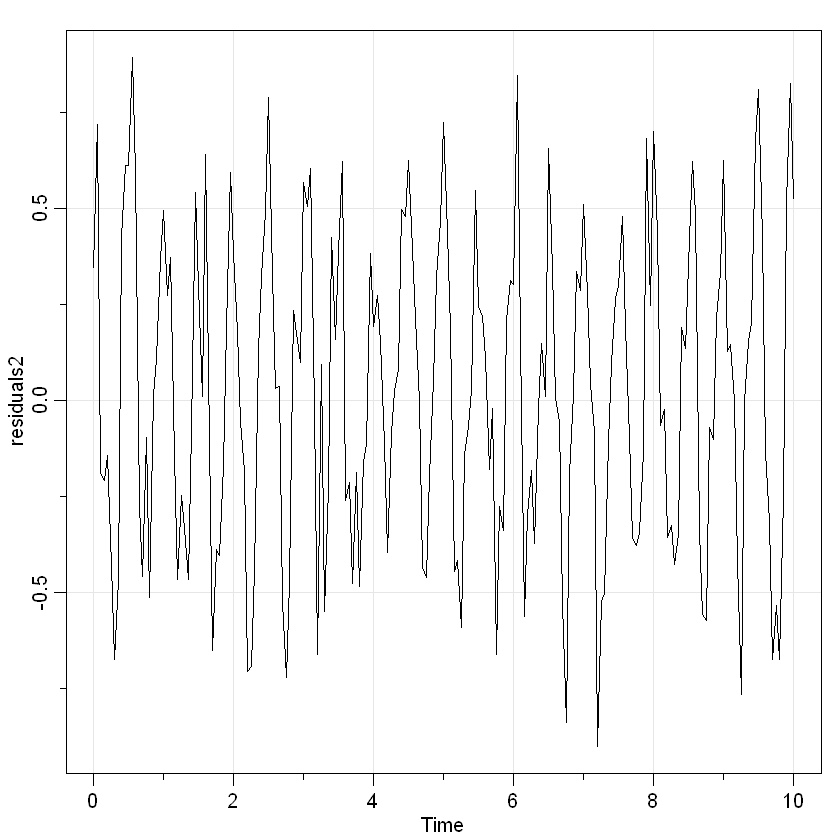

In [19]:
#Analizamos los residuos

residuals2=residuals(fit2)

tsplot(residuals2)

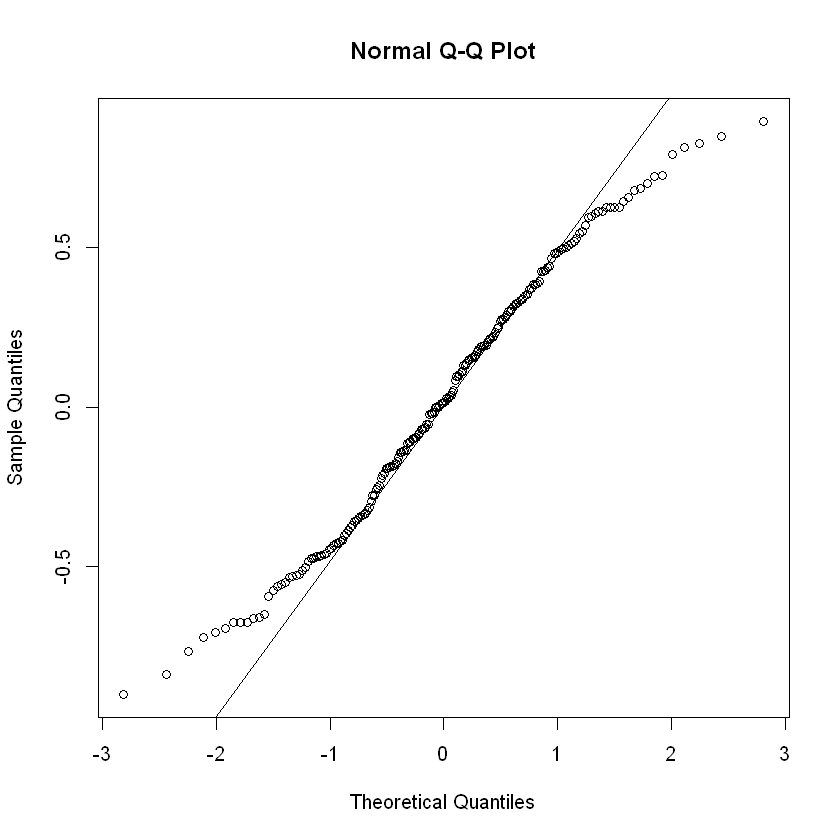

In [20]:
qqnorm(residuals2)
qqline(residuals2)

ACF,0.59,0.19,-0.19,-0.58,-0.74,-0.58,-0.20,0.22,0.53,0.69,...,0.34,0.10,-0.17,-0.35,-0.42,-0.33,-0.08,0.18,0.35,0.42
PACF,0.59,-0.26,-0.29,-0.49,-0.38,-0.21,0.04,0.08,0.05,0.13,...,-0.11,0.03,-0.02,0.00,0.03,0.01,-0.03,0.03,-0.03,0.00


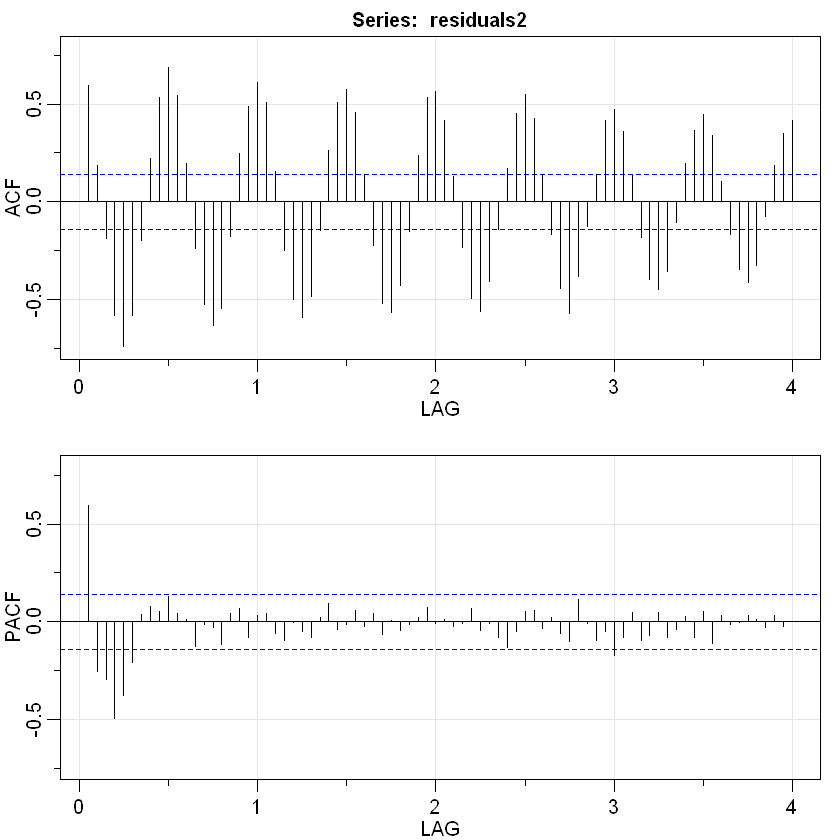

In [21]:
#Analizamos ACF y PACF
acf2(residuals2)

#### 2. Ajuste del modelo de la forma:  𝑥𝑡=𝛽1+𝛽2cos(2𝜋𝑡)+𝛽3sin(2𝜋𝑡)+𝛽4cos(2∗𝜋2𝑡)+𝛽5sin(2𝜋2𝑡).  

In [23]:
fit3 = lm(x_2 ~ 0 + cos(2*pi*t) + sin(2*pi*t) + cos(4*pi*t) + sin(4*pi*t), na.action=NULL)

summary(fit3)


Call:
lm(formula = x_2 ~ 0 + cos(2 * pi * t) + sin(2 * pi * t) + cos(4 * 
    pi * t) + sin(4 * pi * t), na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.47766 -0.12608  0.00771  0.13785  0.58704 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
cos(2 * pi * t)  0.98674    0.02118  46.586   <2e-16 ***
sin(2 * pi * t)  1.01761    0.02129  47.807   <2e-16 ***
cos(4 * pi * t)  0.49238    0.02118  23.246   <2e-16 ***
sin(4 * pi * t) -0.03755    0.02129  -1.764   0.0792 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2129 on 197 degrees of freedom
Multiple R-squared:  0.9622,	Adjusted R-squared:  0.9615 
F-statistic:  1255 on 4 and 197 DF,  p-value: < 2.2e-16


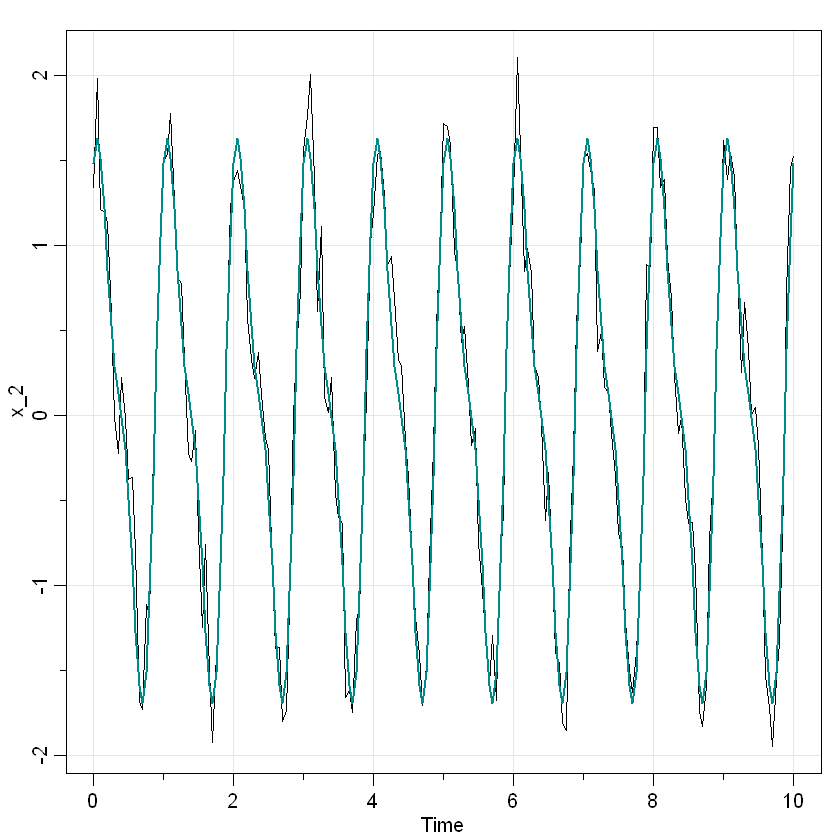

In [24]:
predictions = ts(fitted(fit3), start = 0, frequency=20) #Creo una serie temporal con los valores ajustados.
tsplot(x_2)
lines(predictions, col="darkcyan", lwd=2)

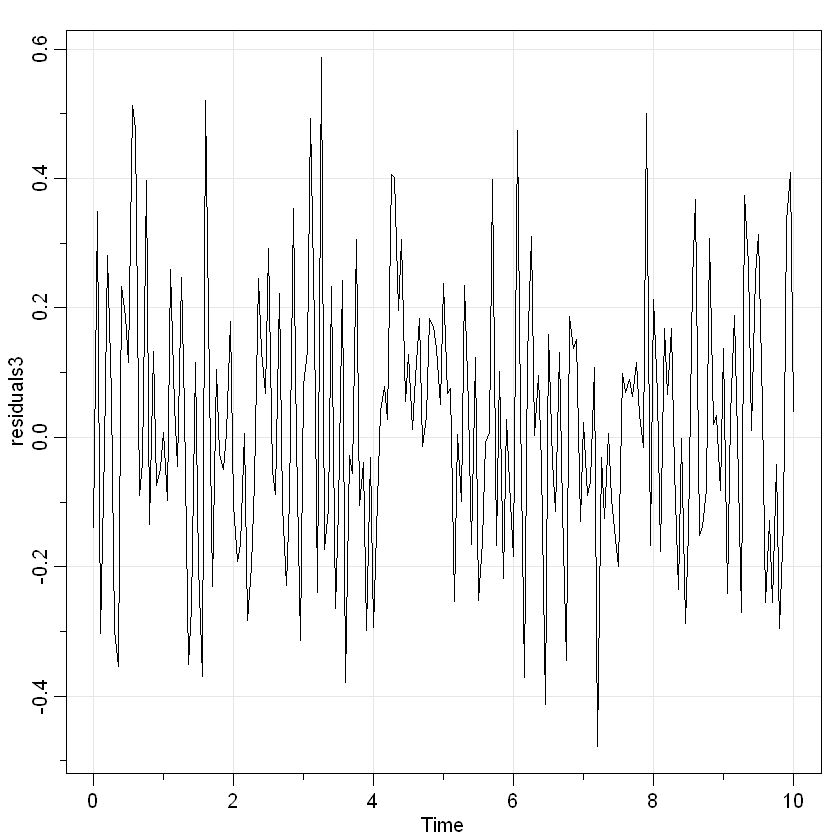

In [26]:
residuals3 = residuals(fit3)
tsplot(residuals3)

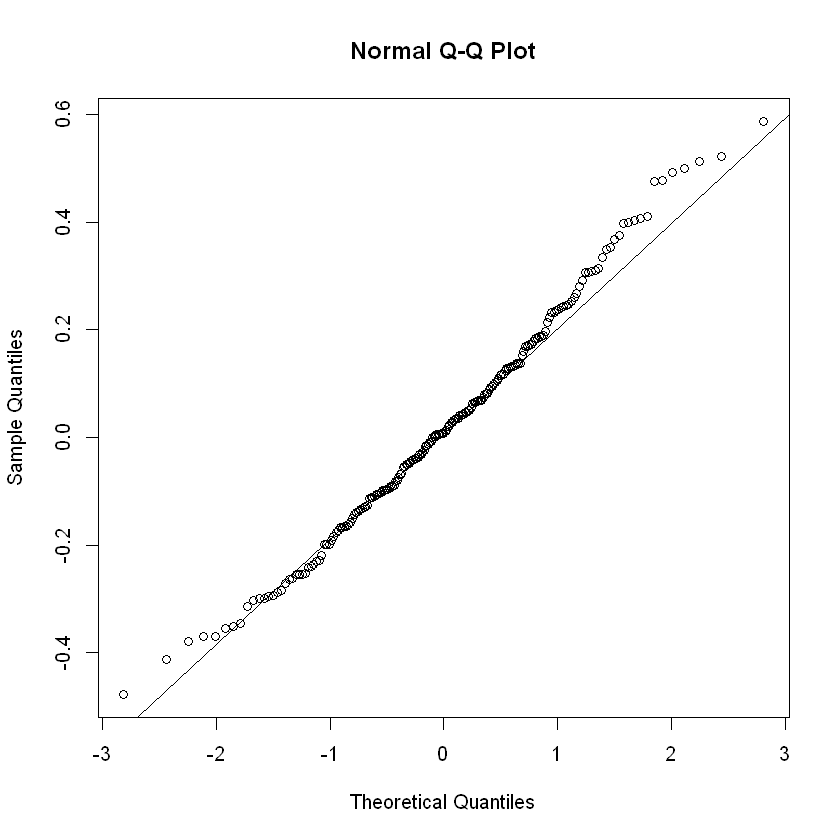

In [27]:
qqnorm(residuals3)
qqline(residuals3)

ACF,0.01,-0.1,0.15,0.00,-0.11,-0.07,0.02,-0.04,-0.12,0.03,...,0.01,0.03,0.02,0.13,0.08,0.02,0.07,0.02,-0.10,-0.01
PACF,0.01,-0.1,0.16,-0.02,-0.09,-0.09,0.01,-0.03,-0.10,0.01,...,-0.09,0.06,0.02,0.02,0.04,0.04,-0.04,-0.02,-0.11,-0.06


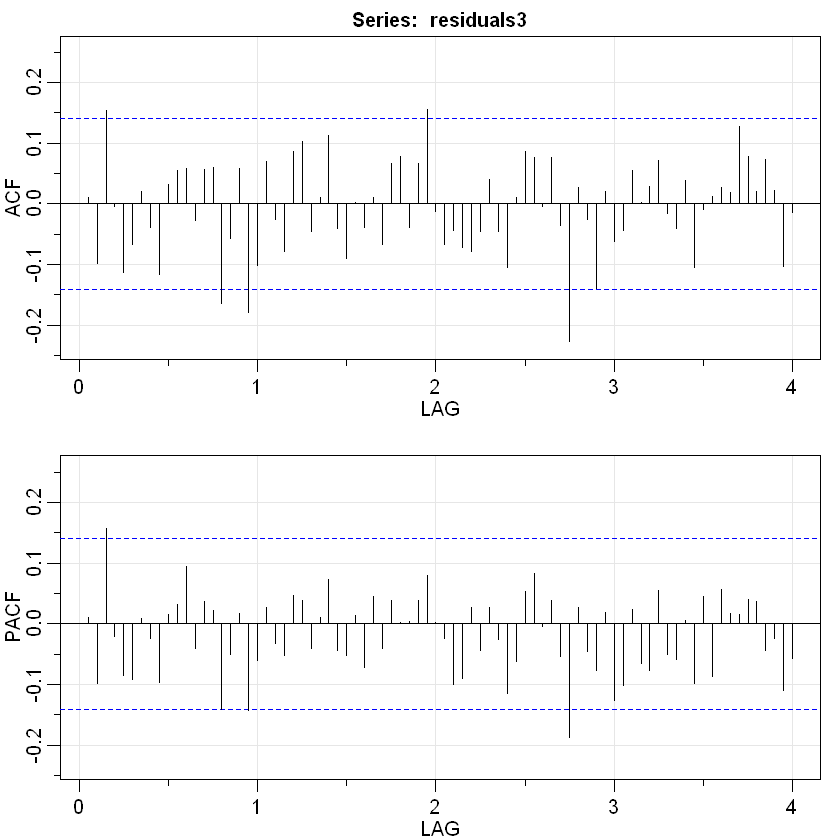

In [28]:
acf2(residuals3)

In [29]:
# Comparamos los valores de AIC y BIC de ambos modelos

AIC(fit2)
BIC(fit2)

AIC(fit3)
BIC(fit3)

[1] 216.5751

[1] 226.485

[1] -45.5742

[1] -29.05767

Tanto del análisis de los gráficos de QQplot, ACF y de los criterios de información de Akaike y Bayesiano podemos ver que el ajuste del segundo modelo (fit3) es significativamente mejor que el anterior, logrando captar de mejor manera los componentes estacionales de la serie. 